In [99]:
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats  as stats

In [45]:
# Windows only
survey_result_df = pd.read_csv(r'D:\UCBerkeley\CourseWork\201909\W266\GitHub\FinalProject-Collab\post-model-check\survey_results.csv', sep='\t') 
# survey_result_df = pd.read_csv('survey_results.csv', sep='\t') 
survey_result_df.apply(pd.to_numeric, errors='coerce')

sim_index_nodup_lst = sorted(set(survey_result_df['Sim_index']))
print(len(sim_index_nodup_lst))

82


In [46]:
sim_index_nodup_lst_check = sim_index_nodup_lst.copy()

survey_prep_questions_path = r'D:\UCBerkeley\CourseWork\201909\W266\GitHub\FinalProject-Collab\survey\question_prep1.txt'
# survey_prep_questions_path = '../survey/question_prep1.txt'
survey_prep_questions_file = open(survey_prep_questions_path, 'r', encoding="utf8").read().split('\n')
sim_input_sentence_lst = []
for (i, row) in enumerate(survey_prep_questions_file):
    # The first row is column names
    if i > 0 and len(row.split('<entry>')) > 1:
        match_index = int(row.split('<entry>')[0])
        if match_index in sim_index_nodup_lst_check:
            # Sanity check: below should print 0 if everything works correctly
            # print(sim_index_nodup_lst_check.index(match_index))
            del sim_index_nodup_lst_check[sim_index_nodup_lst_check.index(match_index)]
            sim_input_sentence_lst.append(row.split('<entry>')[1])
        
print(len(sim_input_sentence_lst))
print(sim_index_nodup_lst_check)

# When I made the survey, I accidentally copied the question from an earlier copy of survey/question_prep1.txt
# As a result, the question with index 201 was in the survey but not in the latest copy of survey/question_prep1.txt
# Manually fix this situation below

81
[201]


In [47]:
sim_input_sentence_lst.insert(sim_index_nodup_lst.index(201), 'But its full realization also implies a greater and greater perfection in the instrumentalities for pacific settlement of controversies between nations.')
print(len(sim_input_sentence_lst))


82


In [55]:
# Windows only
gpt2_tuned_path = r'D:\UCBerkeley\CourseWork\201909\W266\GitHub\FinalProject-Collab\3.CalculateMetrics\20191129_run\test_gpt2tuned_metrics.txt'
xlnet_path = r'D:\UCBerkeley\CourseWork\201909\W266\GitHub\FinalProject-Collab\3.CalculateMetrics\20191129_run\test_xlnet-base-cased_metrics.txt'
lstm_attention_path = r'D:\UCBerkeley\CourseWork\201909\W266\GitHub\FinalProject-Collab\3.CalculateMetrics\20191129_run\test_lstm-attention_metrics.txt'
gpt2_untuned_bert_path = r'D:\UCBerkeley\CourseWork\201909\W266\GitHub\FinalProject-Collab\3.CalculateMetrics\20191129_run\test_bert_smash_metrics.txt'
gpt2_untuned_path = r'D:\UCBerkeley\CourseWork\201909\W266\GitHub\FinalProject-Collab\3.CalculateMetrics\20191129_run\test_gpt2_metrics.txt'

# gpt2_tuned_path = '../3.CalculateMetrics/20191129_run/test_gpt2tuned_metrics.txt'
# xlnet_path = '../3.CalculateMetrics/20191129_run/test_xlnet-base-cased_metrics.txt'
# lstm_attention_path = '../3.CalculateMetrics/20191129_run/test_lstm-attention_metrics.txt'
# gpt2_untuned_bert_path = '../3.CalculateMetrics/20191129_run/test_bert_smash_metrics.txt'
# gpt2_untuned_path = '../3.CalculateMetrics/20191129_run/test_gpt2_metrics.txt'

In [56]:
gpt2_tuned_file = open(gpt2_tuned_path, 'r', encoding="utf8").read().split('<new_line>')
xlnet_file = open(xlnet_path, 'r', encoding="utf8").read().split('<new_line>')
lstm_attention_file = open(lstm_attention_path, 'r', encoding="utf8").read().split('<new_line>')
gpt2_untuned_bert_file = open(gpt2_untuned_bert_path, 'r', encoding="utf8").read().split('<new_line>')
gpt2_untuned_file = open(gpt2_untuned_path, 'r', encoding="utf8").read().split('<new_line>')

In [66]:
survey_result_df.columns

Index(['Sim_index', 'Actual', 'gpt2_tuned', 'xlnet', 'lstm_attention',
       'gpt2_untuned_bert', 'gpt2_untuned'],
      dtype='object')

In [ ]:
vars()[survey_result_df.columns[2]+'_file']

In [ ]:
def sim_metrics_extraction (file, sim_input_sentence_local):
    bleu_res_lst = []
    rouge_n_lst = []
    rouge_l_lst = []
    bert_p_lst = []
    bert_r_lst = []
    bert_f1_lst = []
    
    sim_input_sentence_lst_check = sim_input_sentence_local.copy()
    for i, row in enumerate(file):
        # inp, actual, pred, bleu_res, rouge_n, rouge_l, BERT_P, BERT_R, BERT_F1
        # The file starts with <new_line>
        if i > 0:
            inp = row.split('<entry>')[0]
            bleu_res = row.split('<entry>')[3]
            rouge_n = row.split('<entry>')[4]
            rouge_l = row.split('<entry>')[5]
            BERT_P = row.split('<entry>')[6]
            BERT_R = row.split('<entry>')[7]
            BERT_F1 = row.split('<entry>')[8]
    
            if inp in sim_input_sentence_lst_check:
                # Sanity check: below should print 0 if everything works correctly
                # print(sim_input_sentence_lst_check.index(inp))
                del sim_input_sentence_lst_check[sim_input_sentence_lst_check.index(inp)]
                bleu_res_lst.append(float(bleu_res))
                rouge_n_lst.append(float(rouge_n))
                rouge_l_lst.append(float(rouge_l))
                bert_p_lst.append(float(BERT_P))
                bert_r_lst.append(float(BERT_R))
                bert_f1_lst.append(float(BERT_F1))
        # 2700 is max_line_review set in check-generated-against-test.ipynb
        if i == 2700 or len(sim_input_sentence_lst_check) == 0:
            break
    
    if len(sim_input_sentence_lst_check) > 0:
        print('Warning: missing input sentences - ', sim_input_sentence_lst_check)
        
    df = pd.DataFrame(list(zip( 
        sim_index_nodup_lst, 
        bleu_res_lst, 
        rouge_n_lst, 
        rouge_l_lst, 
        bert_p_lst, 
        bert_r_lst,
        bert_f1_lst
        )), 
        columns =['Sim_index', 'bleu_res', 'rouge_n', 'rouge_l', 'bert_p', 'bert_r', 'bert_f1']) 
        
    return df

In [77]:
metrics_df_dict = dict()
merge_df_dict = dict()
# loop through all five methods
for i in range(2,7):
    method_of_interest = survey_result_df.columns[i]
    file_of_interest = vars()[method_of_interest+'_file'] 
    metrics_df_dict[i] = sim_metrics_extraction(file_of_interest, sim_input_sentence_lst)
    # The code below achieves the same purpose as above but less preferred
    # Reference: https://stackoverflow.com/questions/2259224/python-inserting-a-variable-value-into-a-variable-name
    # vars()['metrics_df'+str(i)] = sim_metrics_extraction(file_of_interest, sim_input_sentence_lst)
    survey_result_df_method = survey_result_df.copy()
    survey_result_df_method.rename(columns={method_of_interest:"human_eval"}, inplace=True)
    survey_result_df_method = survey_result_df_method[['Sim_index', 'human_eval']]
    
    merge_df_dict[i] = pd.merge(survey_result_df_method, metrics_df_dict[i], on='Sim_index')
    # The code below achieves the same purpose as above but less preferred
    # vars()['merge_df'+str(i)] = pd.merge(survey_result_df_method, vars()['metrics_df'+str(i)], on='Sim_index')

In [78]:
merge_df_all = merge_df_dict[2].append([merge_df_dict[3], merge_df_dict[4], merge_df_dict[5], merge_df_dict[6]])

In [79]:
merge_df_all


,Sim_index,human_eval,bleu_res,rouge_n,rouge_l,bert_p,bert_r,bert_f1
0,1191,2.0,0.0,0.528139,0.425219,0.849989,0.880441,0.864947
1,1191,4.0,0.0,0.528139,0.425219,0.849989,0.880441,0.864947
2,1191,2.0,0.0,0.528139,0.425219,0.849989,0.880441,0.864947
3,1937,3.0,0.0,0.363636,0.464571,0.858126,0.839799,0.848864
4,1937,4.0,0.0,0.363636,0.464571,0.858126,0.839799,0.848864
5,1937,3.0,0.0,0.363636,0.464571,0.858126,0.839799,0.848864
6,1937,4.0,0.0,0.363636,0.464571,0.858126,0.839799,0.848864
7,1937,2.0,0.0,0.363636,0.464571,0.858126,0.839799,0.848864
8,1937,5.0,0.0,0.363636,0.464571,0.858126,0.839799,0.848864
9,278,3.0,0.0,0.521739,0.484238,0.838827,0.862950,0.850717


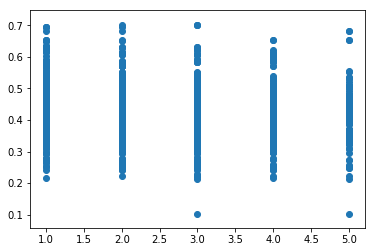

In [88]:
# 'bleu_res', 'rouge_n', 'rouge_l', 'bert_p', 'bert_r', 'bert_f1'
plt.scatter(merge_df_all['human_eval'], merge_df_all['rouge_n'])
plt.show()

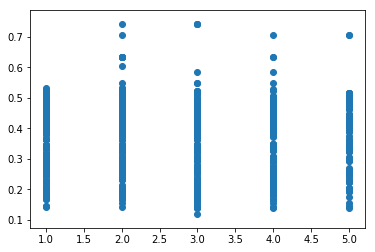

In [89]:
plt.scatter(merge_df_all['human_eval'], merge_df_all['rouge_l'])
plt.show()

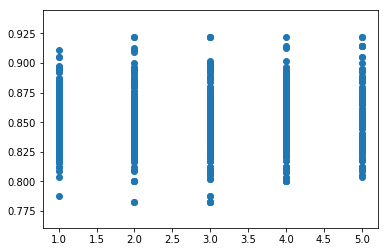

In [90]:
plt.scatter(merge_df_all['human_eval'], merge_df_all['bert_p'])
plt.show()

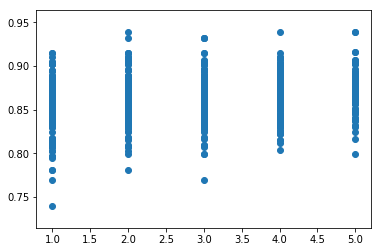

In [91]:
plt.scatter(merge_df_all['human_eval'], merge_df_all['bert_r'])
plt.show()

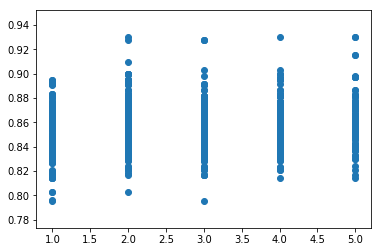

In [92]:
plt.scatter(merge_df_all['human_eval'], merge_df_all['bert_f1'])
plt.show()

In [101]:
merge_df_all.drop(columns=['Sim_index']).corr()
print(stats.pearsonr(merge_df_all['human_eval'], merge_df_all['bert_r']))
print(stats.pearsonr(merge_df_all['human_eval'], merge_df_all['bert_f1']))

(0.21520448430935749, 6.087268519271933e-12)
(0.09203706786069105, 0.003579606314412884)


In [97]:
avg_by_human_eval_df = merge_df_all.groupby(['human_eval']).mean()
avg_by_human_eval_df

,Sim_index,bleu_res,rouge_n,rouge_l,bert_p,bert_r,bert_f1
human_eval,,,,,,,
1.0,1359.741071,0.0,0.464243,0.387691,0.854748,0.854077,0.854171
2.0,1284.495690,0.0,0.437798,0.393854,0.854169,0.862101,0.857881
3.0,1348.581301,0.0,0.419378,0.377385,0.847797,0.862983,0.855087
4.0,1270.657895,0.0,0.418072,0.359438,0.847845,0.867331,0.857230
5.0,1190.592593,0.0,0.417904,0.377132,0.854973,0.871025,0.862659


In [98]:
avg_by_human_eval_df['rouge_n']



human_eval
1.0    0.464243
2.0    0.437798
3.0    0.419378
4.0    0.418072
5.0    0.417904
Name: rouge_n, dtype: float64